In [1]:
# 1.0 Initialize


# 1.1 Import statements 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.2 Read data set
data = pd.read_csv('../Datasets/heart.csv')
df = pd.DataFrame(data)

In [2]:
# 2.0 Data Information

In [3]:
# 2.1 Top 5 rows of the table
df.head()

,age,sex,cp,trestbps,chol,fbs,ca,thalach,exang,target
0,63,1,3,145,233,1,0,150,0,1
1,37,1,2,130,250,0,0,187,0,1
2,41,0,1,130,204,0,0,172,0,1
3,56,1,1,120,236,0,0,178,0,1
4,57,0,0,120,354,0,0,163,1,1


In [4]:
# 2.2 Bottom 5 rows of the table
df.tail()

,age,sex,cp,trestbps,chol,fbs,ca,thalach,exang,target
295,57,0,0,140,241,0,0,123,1,0
296,45,1,3,110,264,0,0,132,0,0
297,68,1,0,144,193,1,2,141,0,0
298,57,1,0,130,131,0,1,115,1,0
299,57,0,1,130,236,0,1,174,0,0


In [5]:
# 2.3 Table information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       300 non-null    int64
 1   sex       300 non-null    int64
 2   cp        300 non-null    int64
 3   trestbps  300 non-null    int64
 4   chol      300 non-null    int64
 5   fbs       300 non-null    int64
 6   ca        300 non-null    int64
 7   thalach   300 non-null    int64
 8   exang     300 non-null    int64
 9   target    300 non-null    int64
dtypes: int64(10)
memory usage: 23.6 KB


In [6]:
# 3.0 Data Cleaning Process

In [7]:
# 3.1 Verfify that all the table contents are unique

df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
ca            5
thalach      91
exang         2
target        2
dtype: int64

In [8]:
# 3.2 Sex should only have 2 unique values
df['sex'].unique()

array([1, 0], dtype=int64)

In [9]:
# 3.3 Chest pain should only have 4 unique values
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [10]:
# 3.4 Fasting blood sugar and glucose level should only have 2 unique value
df['fbs'].unique()

array([1, 0], dtype=int64)

In [11]:
# 3.5 fasting blood sugar and glucose level should only have 2 unique value
df['ca'].unique()

# Have 5 values when it should only be 3
lst = df['ca'] == 4

# Replace it with NaN
df.loc[lst, 'ca'] = np.NaN

# Replace NaN with median 
df = df.fillna(df.median())

# Verify
df['ca'].unique()

array([0., 2., 1., 3.])

In [12]:
# 3.6 Excercise Induced Angina should only have 2 unique value
df['exang'].unique()

array([0, 1], dtype=int64)

In [13]:
# 3.7 Target should only have 2 unique value
df['target'].unique()

array([1, 0], dtype=int64)

In [14]:
# 3.8 Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
ca          0
thalach     0
exang       0
target      0
dtype: int64

In [15]:
# 3.8 Remove any duplicate rows
df.drop_duplicates(keep=False,inplace=True)

In [16]:
# 4.0 Table Statisctics
df.describe()

,age,sex,cp,trestbps,chol,fbs,ca,thalach,exang,target
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,54.526846,0.681208,0.963087,131.604027,246.983221,0.144295,0.674497,149.607383,0.325503,0.543624
std,9.032356,0.466792,1.032460,17.674886,51.844332,0.351980,0.938202,22.923314,0.469351,0.498931
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.250000,0.000000,0.000000,133.250000,0.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.500000,0.000000,0.000000,152.500000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,3.000000,202.000000,1.000000,1.000000


In [17]:
# 5.0 Rename labels for better visulization

# 5.1 Rename sex
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})

# 5.2 Rename chest pain
df['cp'] = df.cp.replace({0: "Typical Angina", 1: "Atypical Angina", 2: "Non-Anginal Pain", 3: "Asymptomatic"})

# 5.3 Remane fasting blood sugar and glucose
df['fbs'] = df.fbs.replace({0: "False", 1: "True"})

# 5.5 Rename excercise induced angina
df['exang'] = df.exang.replace({1: "Yes", 0: "No"})

# 5.6 Rename heart disease
df['target'] = df.target.replace({1: "Heart Disease", 0: "No Heart Disease"})

# 5.5 Display the update table
df.head()

,age,sex,cp,trestbps,chol,fbs,ca,thalach,exang,target
0,63,Male,Asymptomatic,145,233,True,0.0,150,No,Heart Disease
1,37,Male,Non-Anginal Pain,130,250,False,0.0,187,No,Heart Disease
2,41,Female,Atypical Angina,130,204,False,0.0,172,No,Heart Disease
3,56,Male,Atypical Angina,120,236,False,0.0,178,No,Heart Disease
4,57,Female,Typical Angina,120,354,False,0.0,163,Yes,Heart Disease


In [18]:
# 6.0 Outliners

<AxesSubplot:xlabel='target', ylabel='trestbps'>

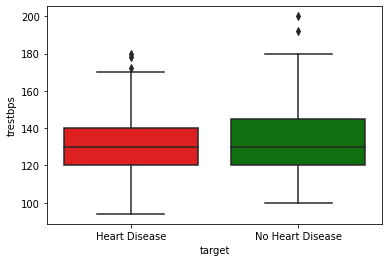

In [19]:
# 6.1 target and rest blood pressure
sns.boxplot(x='target', y='trestbps', data=df, palette=('red','green'))

<AxesSubplot:xlabel='target', ylabel='age'>

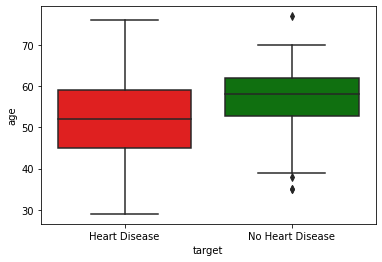

In [20]:
# 6.2 target and age
sns.boxplot(x='target', y='age', data=df, palette=('red','green'))

<AxesSubplot:xlabel='target', ylabel='thalach'>

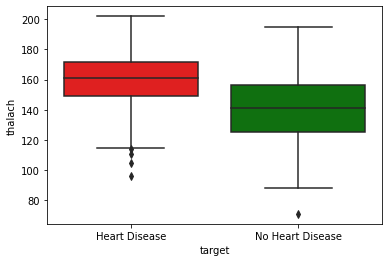

In [21]:
# 6.3 target and maximum and heart rate received
sns.boxplot(x='target', y='thalach', data=df, palette=('red','green'))

In [22]:
# 7.0 Visualizing data

Text(0.5, 1.0, 'Age Distribution')

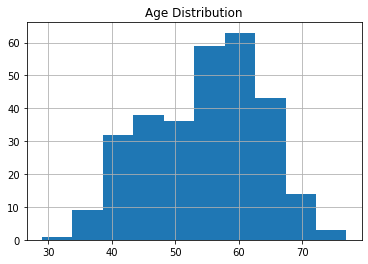

In [23]:
# 7.1 Age Distribution
df['age'].hist().plot()
plt.title("Age Distribution")

Text(0.5, 1.0, 'Resting Blood Pressure (mm Hg) Distribution')

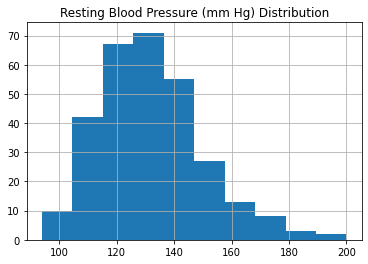

In [24]:
# 7.2 Resting Blood Pressure (mm Hg) Distribution
df['trestbps'].hist().plot()
plt.title("Resting Blood Pressure (mm Hg) Distribution")

Text(0.5, 1.0, 'Serum Cholestoral (mg/dl) Distribution')

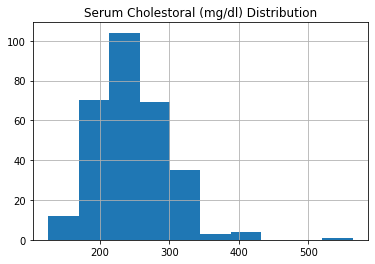

In [25]:
# 7.3 Serum Cholestoral (mg/dl) Distribution
df['chol'].hist().plot()
plt.title("Serum Cholestoral (mg/dl) Distribution")

Text(0.5, 1.0, 'Maximum Heart Rate Achieved Distribution')

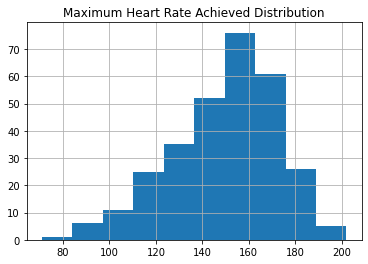

In [26]:
# 7.4 Maximum Heart Rate Achieved Distribution
df['thalach'].hist().plot()
plt.title("Maximum Heart Rate Achieved Distribution")

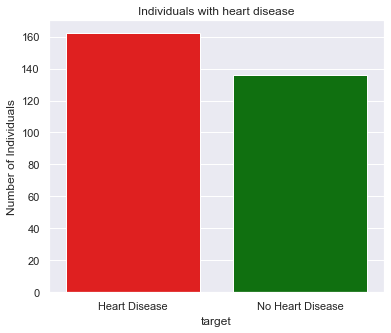

In [27]:
# 7.5 Heart Disease vs No heart Disease plot
plt.figure(figsize=(6,5)) 
sns.set_theme(style="darkgrid")
sns.countplot(x="target", data=df, palette=('red','green'))
plt.title("Individuals with heart disease")
plt.ylabel("Number of Individuals")
plt.show()

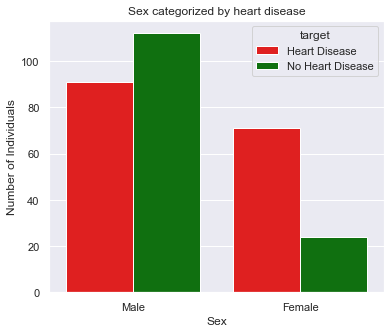

In [28]:
# 7.6 Sex distribution to heart disease
plt.figure(figsize=(6,5)) 
sns.countplot(x='sex', hue='target', data=df, palette=('red','green'))
plt.title("Sex categorized by heart disease")
plt.ylabel("Number of Individuals")
plt.xlabel("Sex")
plt.show()

<Figure size 432x360 with 0 Axes>

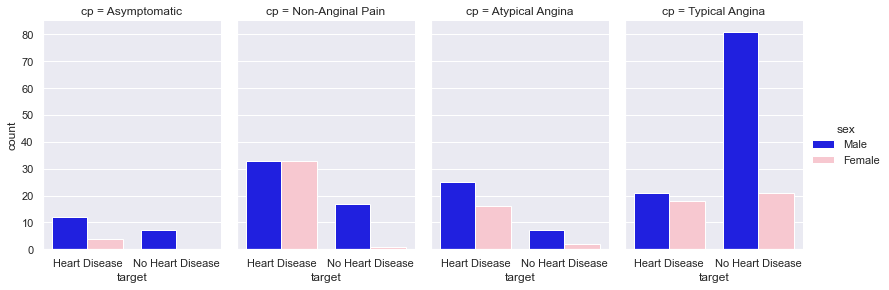

In [29]:
# 7.7 Sex distribution to heart disease per chest pain
plt.figure(figsize=(6,5)) 
sns.catplot(x="target", hue="sex", col="cp",
                data=df, kind="count",
                height=4, aspect=.7, palette=('blue','pink'))

Text(0, 0.5, 'Age')

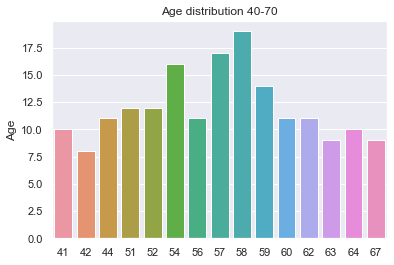

In [30]:
# 7.8 Heart Disease age distribution top 15 age categories
x = df.age.value_counts()[:15]
y = df.age.value_counts()[:15]
sns.barplot(x=x.index, y=y.values)
plt.title('Age distribution 40-70')
plt.ylabel('Age')

Text(0.5, 0, 'Excercise Induced Angina')

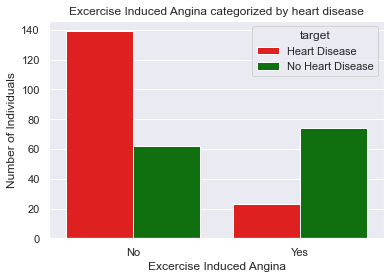

In [31]:
# 7.9 Exercise Induced Angina distribution count related to target 
sns.countplot(x='exang', hue='target', data=df, palette=('red','green'))
plt.title("Excercise Induced Angina categorized by heart disease")
plt.ylabel("Number of Individuals")
plt.xlabel("Excercise Induced Angina")

Text(0.5, 0, 'Fasting blood sugar & glucose at 120 mg/dl')

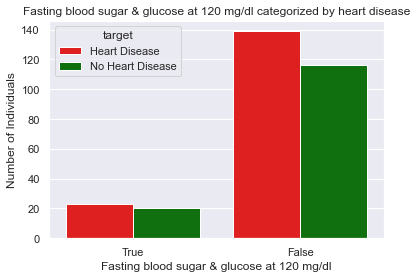

In [32]:
# 7.10 Fasting blood sugar & glucose at 120 mg/dl distribution count related to target 
sns.countplot(x='fbs', hue='target', data=df, palette=('red','green'))
plt.title("Fasting blood sugar & glucose at 120 mg/dl categorized by heart disease")
plt.ylabel("Number of Individuals")
plt.xlabel("Fasting blood sugar & glucose at 120 mg/dl")

Text(0.5, 0, 'Number of major vessels (0-3) colored by flourosopy')

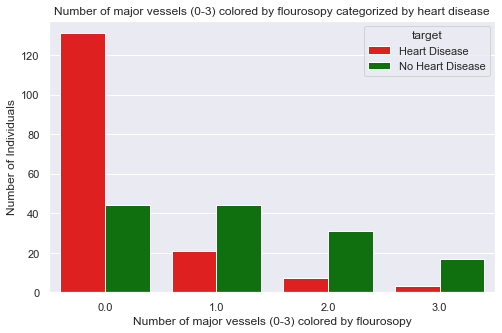

In [33]:
# 7.11 Number of major vessels (0-3) colored by flourosopy distribution count related to target 
plt.figure(figsize=(8,5)) 
sns.countplot(x='ca', hue='target', data=df, palette=('red','green'))
plt.title("Number of major vessels (0-3) colored by flourosopy categorized by heart disease")
plt.ylabel("Number of Individuals")
plt.xlabel("Number of major vessels (0-3) colored by flourosopy")

Text(0.5, 8.95999999999998, 'Maximum Heart Rate Acheived Distribution')

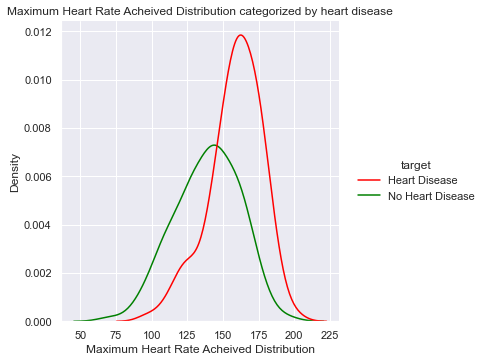

In [34]:
# 7.12 Maximum Heart Rate Acheived Distribution categorized by heart disease
sns.displot(data=df, x="thalach", hue="target", kind="kde", palette=('red','green'))
plt.title("Maximum Heart Rate Acheived Distribution categorized by heart disease")
plt.xlabel("Maximum Heart Rate Acheived Distribution")

Text(0.5, 8.95999999999998, 'Serum Cholestoral (mg/dl) Distribution')

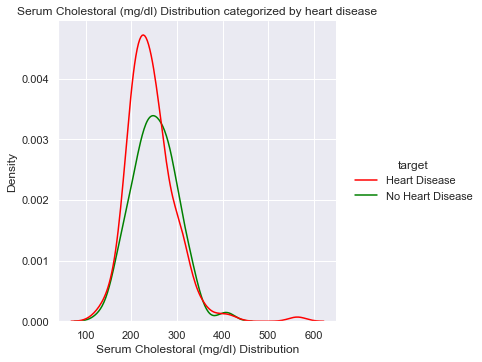

In [35]:
# 7.13 Serum Cholestoral (mg/dl) Distribution categorized by heart disease
sns.displot(data=df, x="chol", hue="target", kind="kde", palette=('red','green'))
plt.title("Serum Cholestoral (mg/dl) Distribution categorized by heart disease")
plt.xlabel("Serum Cholestoral (mg/dl) Distribution")

Text(0.5, 8.95999999999998, 'Resting Blood Pressure (mm Hg) Distribution')

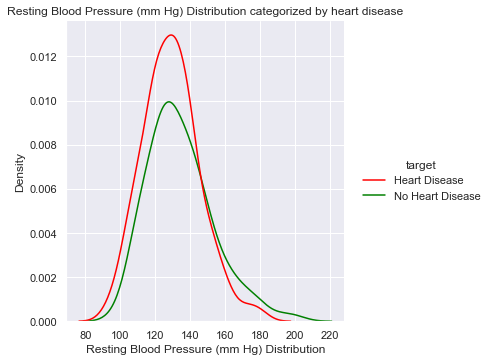

In [36]:
# 7.14 Resting Blood Pressure (mm Hg) Distribution categorized by heart disease
sns.displot(data=df, x="trestbps", hue="target", kind="kde", palette=('red','green'))
plt.title("Resting Blood Pressure (mm Hg) Distribution categorized by heart disease")
plt.xlabel("Resting Blood Pressure (mm Hg) Distribution")

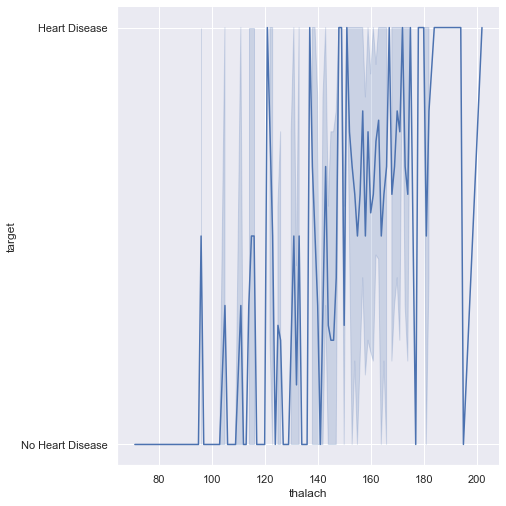

In [37]:
# 7.15 Chest pain types to age distribution (increasing)
sns.relplot(
    data=df, x="thalach", y="target",
    kind="line", height=7
)

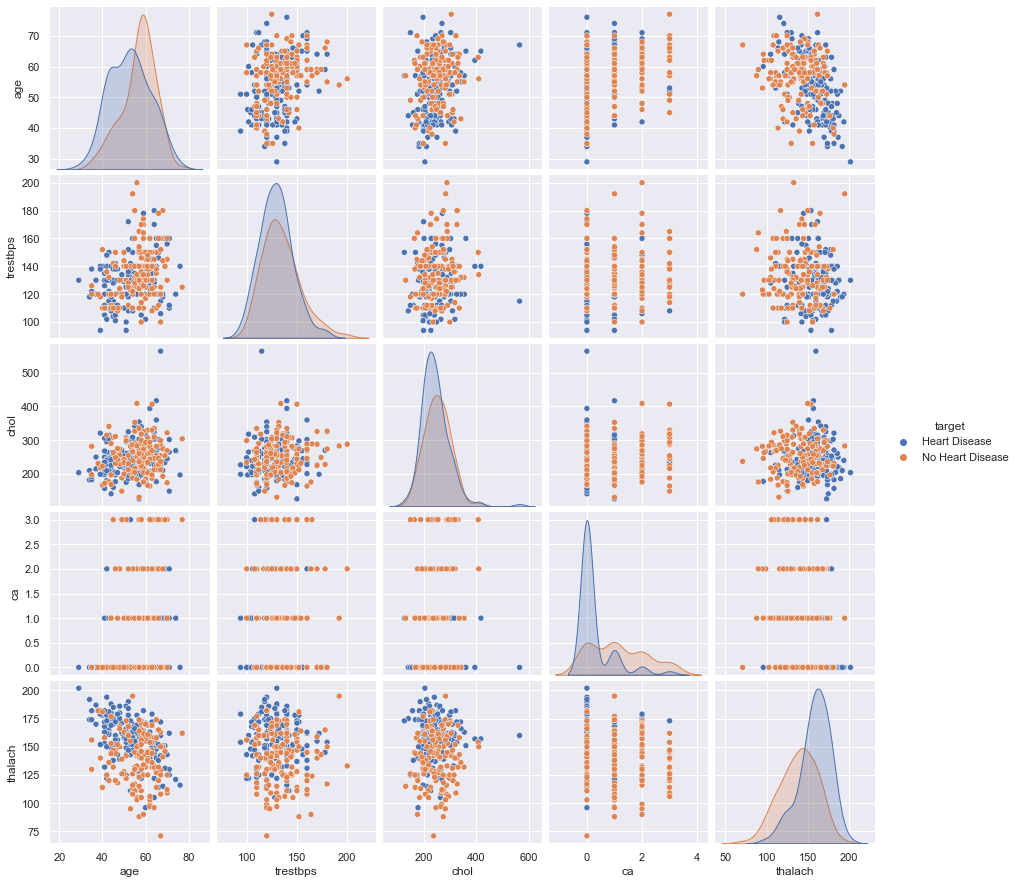

In [38]:
# 7.15 Pair plot
sns.pairplot(data=df,hue='target')

Text(0.5, 1.0, 'Heatmap')

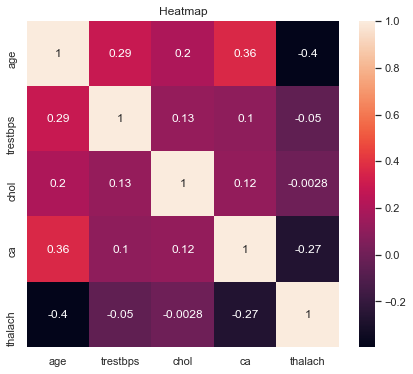

In [39]:
# 7.16 Data Heatmap
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap")